# Capsicum Germplasm Database

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
%qtconsole

In [3]:
#df = pd.read_csv("../data/capsicum_ml_600.csv")
#df_full = pd.read_csv("../data/capsicum_full_600.csv")
#print("--- UNIQUE LABELS ---")
#print("\n".join(labeled_data.unique()))
#print()


In [4]:
df = pd.read_csv("../data/capsicum_ml_600.csv")
df_full = pd.read_csv("../data/capsicum_full_600.csv")

df = pd.read_csv("../data/capsicum_ml_4868.csv")
full_df = pd.read_csv("../data/capsicum_full_4868.csv")
full_df = full_df.set_index('id')

In [5]:
print("--- UNIQUE LABELS ---")
print("\n".join(df['latin_name'].dropna().unique()))
print()

print(len(df))
df.head()

--- UNIQUE LABELS ---
Capsicum annuum L.
Capsicum baccatum L. var. baccatum
Capsicum baccatum L. var. pendulum (Willd.) Eshbaugh
Capsicum chinense Jacq.
Capsicum spp.
Capsicum frutescens L.
Capsicum annuum L. var. glabriusculum (Dunal) Heiser & Pickersgill
Capsicum baccatum L.
Capsicum pubescens Ruiz & Pav.
Capsicum chacoense Hunz.
Solanum pseudocapsicum L.
Capsicum baccatum L. var. praetermissum (Heiser & P. G. Sm.) Hunz.
Abelmoschus moschatus Medik.
Arachis microsperma Krapov. et al.
Capsicum galapagoense Hunz.
Capsicum baccatum L. var. umbilicatum (Vell.) Hunz. & Barboza
Capsicum flexuosum Sendtn.
Amaranthus hypochondriacus L.
Capsicum schottianum Sendtn.
Capsicum eximium Hunz.
Capsicum rhomboideum (Dunal) Kuntze
Solanum melongena L.

4868


,id,url,plant_id,latin_name,phytophthora root rot,determinate habit,plant habit,blossom end shape,calyx constriction,calyx margin,...,photoperiod,root knot nematode,southern blight,growth habit,bract length in millimeters,branching index,inflorescence density,terminal inflorescence,hundred seed weight,number of seeds per gram
0,1012450,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 631128,Capsicum annuum L.,9.0,1.0,9.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1209205,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 281306,Capsicum baccatum L. var. baccatum,NaN,NaN,5.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1225551,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 298654,Capsicum annuum L.,9.0,NaN,5.0,5.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1180150,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 223035,Capsicum annuum L.,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1336492,https://npgsweb.ars-grin.gov/gringlobal/access...,PI 441556,Capsicum baccatum L. var. pendulum (Willd.) Es...,NaN,NaN,5.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Features

In [6]:
#for c in df.columns:
    #print(df[c].head())
xs = []
ys = []

#for limit in range(100,600,10):
for limit in range(100,4000,50):
    popular_columns = []

    for c in df.columns:
        valid_plants = df[c].dropna() 
        plant_count = valid_plants.shape[0]
        #print(f"{c:35} {count}")
        if plant_count > limit:
            popular_columns.append(c)

    trimmed_df = df[popular_columns].dropna(0)
    x, y = trimmed_df.shape
    xs.append(x)
    ys.append(y)

    #valid_values = df[c][df[c] != np.nan]

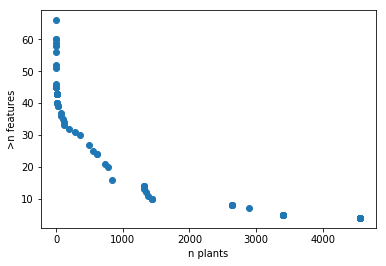

In [7]:
fig, ax = plt.subplots()
ax.scatter(xs,ys)
ax.set_xlabel("n plants")
ax.set_ylabel(">n features")
plt.show()

In [8]:
## Do it all again, but for a specific limit...

limit = 2500

popular_columns = []

for c in df.columns:
    valid_plants = df[c].dropna() 
    plant_count = valid_plants.shape[0]
    #print(f"{c:35} {count}")
    if plant_count > limit:
        popular_columns.append(c)

trimmed_df = df[popular_columns].dropna(0)

In [9]:
labeled_data = trimmed_df['latin_name']
feature_data = trimmed_df.drop(['url', 'plant_id', 'latin_name'], axis=1)

print(feature_data.shape)

print()
print("--- UNIQUE LABELS ---")
print("\n".join(labeled_data.unique()))
_cA = len(labeled_data.unique())
_cB = len(df['latin_name'].unique())
print()
print(f"{_cA} out of {_cB} labels")
print()
print(feature_data.head())

(1321, 11)

--- UNIQUE LABELS ---
Capsicum annuum L.
Capsicum annuum L. var. glabriusculum (Dunal) Heiser & Pickersgill
Capsicum chinense Jacq.
Capsicum frutescens L.

4 out of 23 labels

        id  phytophthora root rot  calyx shape  fruit length  \
0  1012450                    9.0          1.0           9.0   
2  1225551                    9.0          2.0           8.0   
3  1180150                    9.0          1.0           4.0   
5  1276040                    7.0          2.0          14.0   
9  1252733                    9.0          2.0           8.0   

   fruit pods per node  fruit position  fruit shape  fruit width  \
0                  1.0             1.0          6.0          6.0   
2                  1.0             1.0          4.0          5.0   
3                  1.0             1.0          1.0          2.0   
5                  1.0             1.0          1.0          2.0   
9                  1.0             9.0          6.0          5.0   

   mature fruit co

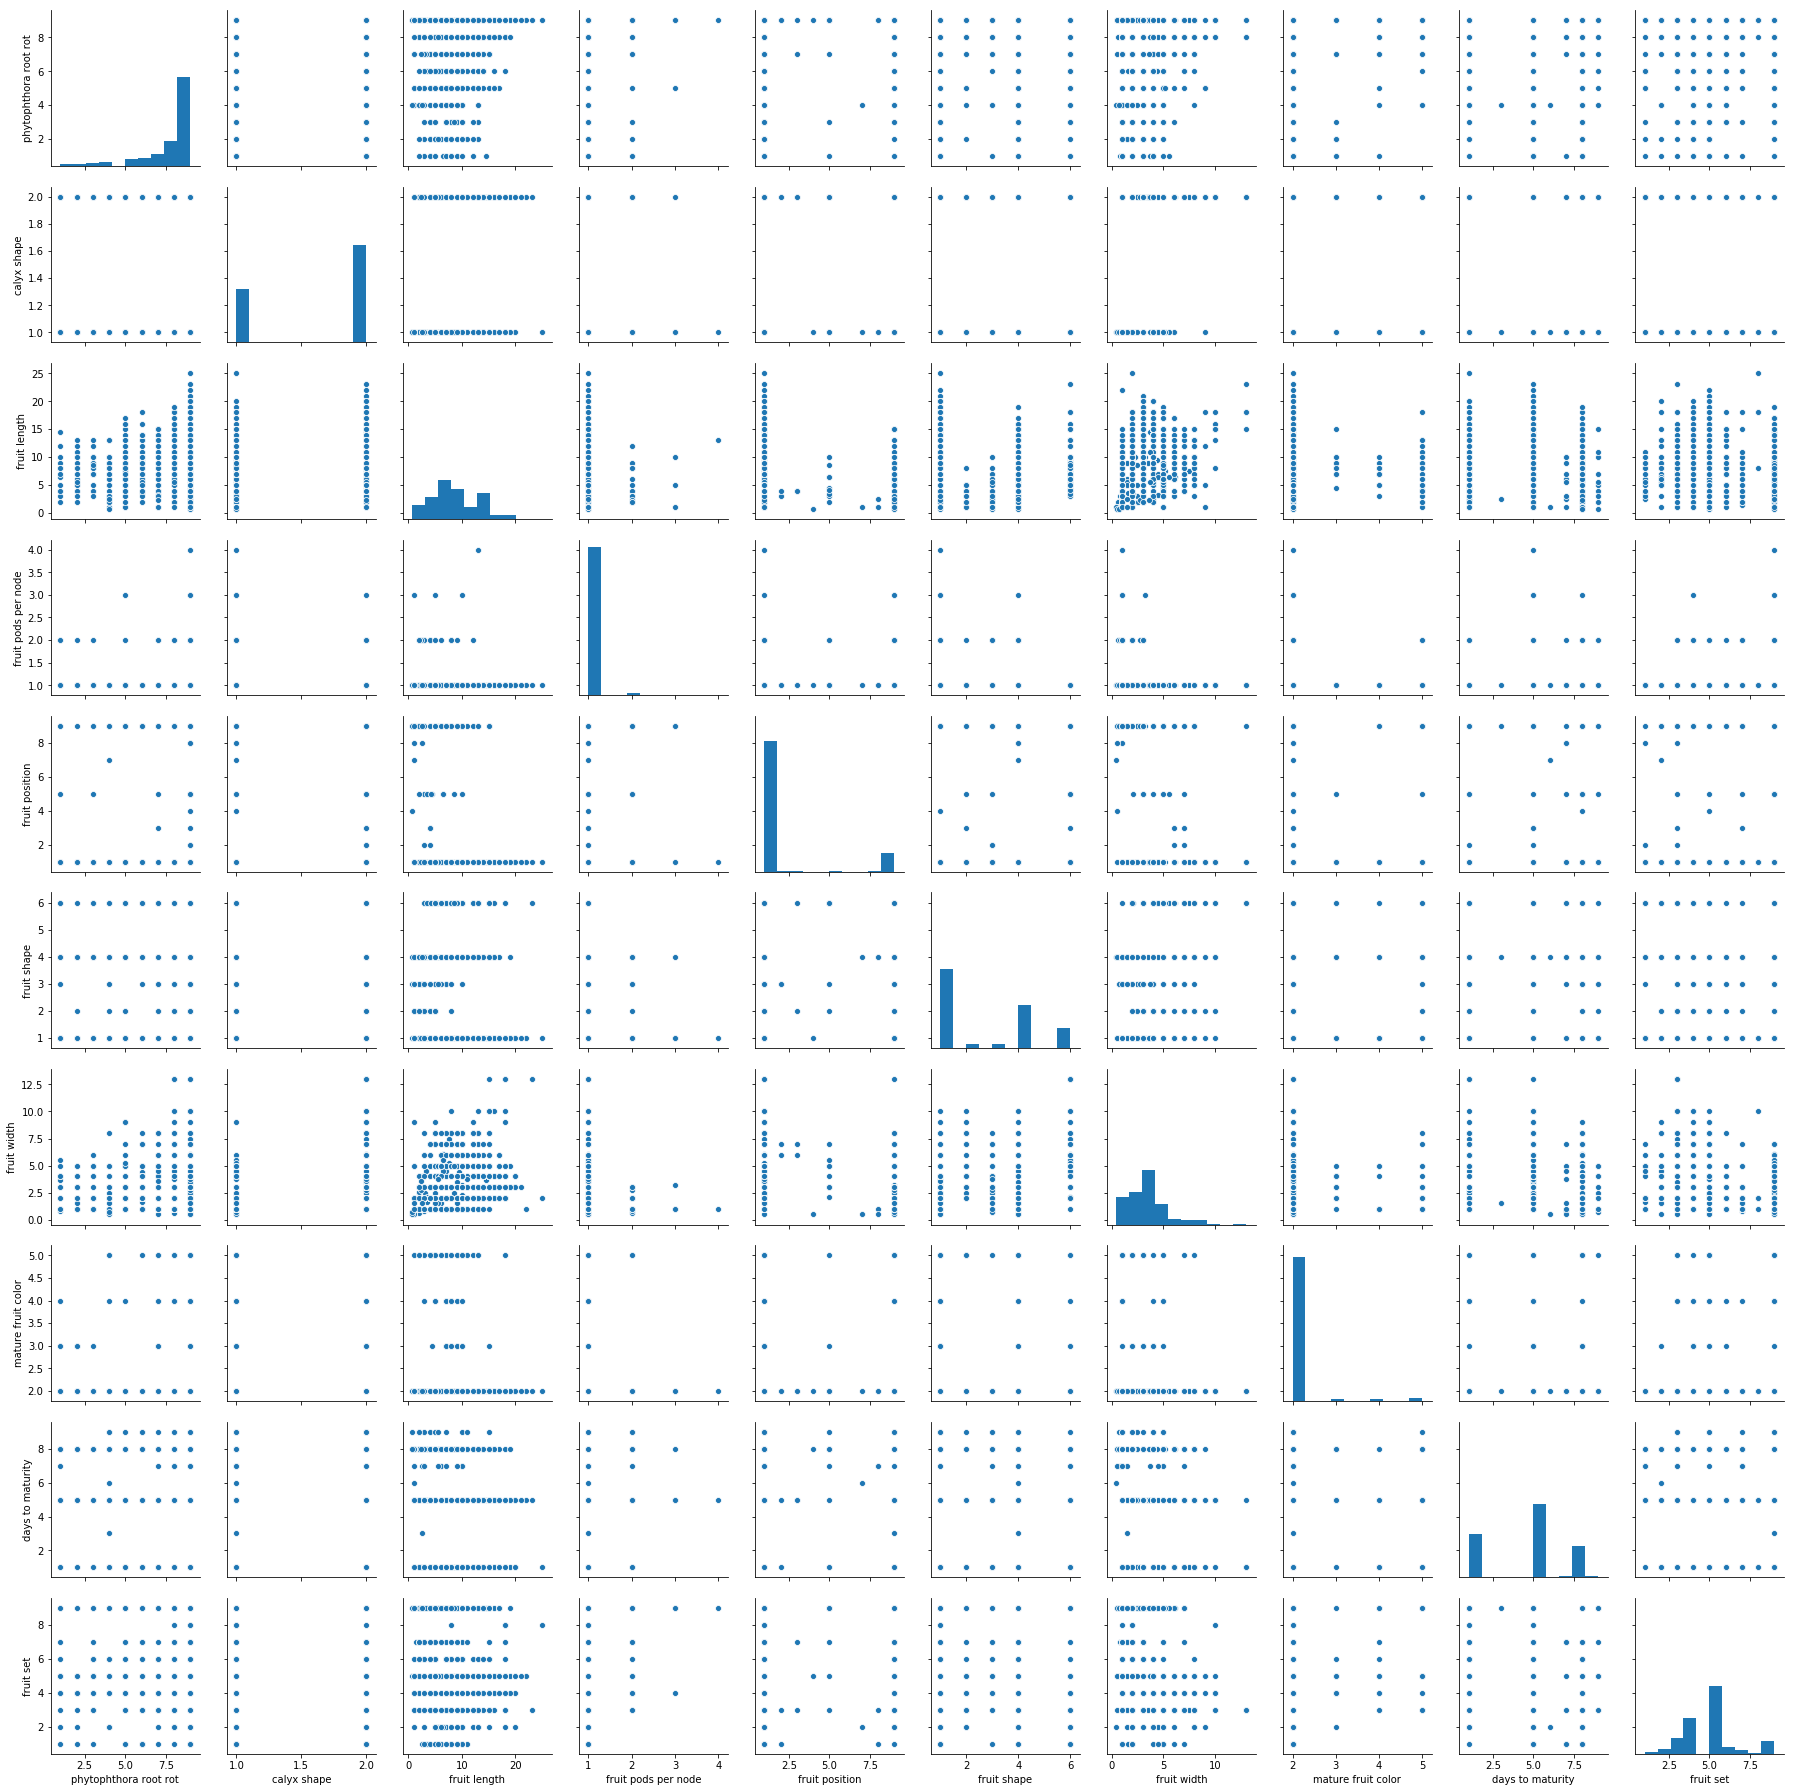

In [10]:
pp_data = feature_data.reset_index(drop=True).drop('id', 1)
sns.pairplot(pp_data, hue=None, diag_kind='hist')

In [11]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1, min_samples=3).fit(pp_scaled)
print(clustering.labels_)
print(clustering)
outlier_count = len(feature_data['id'][clustering.labels_ == -1])
print(f"n_outliers: {outlier_count}")

NameError: name 'pp_scaled' is not defined

In [ ]:
#from sklearn.cluster import DBSCAN
#
#clustering = DBSCAN(eps=3, min_samples=3).fit(pp_data)
#print(clustering.labels_)
#print(clustering)
#outlier_count = len(feature_data['id'][clustering.labels_ == -1])
#print(f"n_outliers: {outlier_count}")

In [ ]:
sns.pairplot(pp_data[clustering.labels_ == -1], hue=None, diag_kind='hist'c